# 라이브러리 버전 확인

In [14]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [2]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.8.2
1.21.6


# 이미지 28x28로 만들기

In [4]:
# 이미지 28x28로 만들기

from PIL import Image
import glob
import os

In [6]:
# 가위 이미지 28x28로 만들기

def resize_images(img_path):
  images=glob.glob(img_path + "/*.jpg")

  print(len(images), " images to be resized.")

  target_size = (28,28)
  for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")

  print(len(images), " images resized")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_scissor_path = "C:\OA\rock_scissor_paper\scissor"
resize_images(image_dir_scissor_path)



0  images to be resized.
0  images resized


In [7]:
# 주먹과 보 이미지 28x28로 만들기

image_dir_rock_path = "C:\OA\rock_scissor_paper\rock"
image_dir_paper_path = "C:\OA\rock_scissor_paper\paper"
resize_images(image_dir_rock_path)
resize_images(image_dir_paper_path)

0  images to be resized.
0  images resized
0  images to be resized.
0  images resized


In [12]:
import numpy as np

# 가위바위보 이미지 개수 총합에 주의하세요.
# 가위 : 0, 바위 : 1, 보 : 2

def load_data(img_path, number_of_data=300):
  img_size=28
  color=3

  # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.

  imgs=np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
  labels=np.zeros(number_of_data, dtype = np.int32)

  idx = 0
  for file in glob.iglob(img_path+'/scissor/*jpg'):
    img = np.array(Image.open(file), dtype=np.int32)
    imgs[idx,:,:,:] = img
    labels[idx]=0 # 가위 : 0
    idx = idx + 1
  
  for file in glob.iglob(img_path+'/rock/*jpg'):
    img = np.array(Image.open(file), dtype=np.int32)
    imgs[idx,:,:,:] = img
    labels[idx]=1 # 바위 : 1
    idx = idx + 1

  for file in glob.iglob(img_path+'/paper/*jpg'):
    img = np.array(Image.open(file), dtype=np.int32)
    imgs[idx,:,:,:] = img
    labels[idx]=2 # 보 : 2
    idx = idx + 1

  print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
  return imgs, labels

images_dir_path = "C:\OA\rock_scissor_paper"
(x_train, y_train) = load_data(images_dir_path)
# 입력은 0~1 사이의 값으로 정규화
x_train_norm = x_train/255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 0 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


### 한번 이미지를 불러와볼까?

라벨: 0


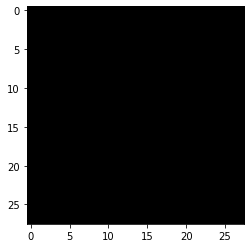

In [11]:
import matplotlib as plt
plt.pyplot.imshow(x_train[0])
print('라벨:', y_train[0])

# 딥러닝 네트워크 설계하기

가위바위보를 인식하는 딥러닝 네트워크를 설계

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))